In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 1. Load the dataset
df = pd.read_csv('/Users/owlxshri/Desktop/coral reef/mlpr-project/statisticalinf/g4m copy.csv')

# # 2. Check for missing values
df.dropna(inplace=True)

# # 3. Separate features and target
X = df.drop('Bleaching', axis=1)
y = df['Bleaching'].astype(int)  # ensure target is integer (0/1)

# 4. Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 5. Reshape for LSTM (samples, timesteps=1, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# 7. Build LSTM model
model = Sequential([
    LSTM(64, input_shape=(1, X.shape[1]), return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])

# 8. Train
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_split=0.2, callbacks=[early_stop], verbose=1)

# 9. Evaluate
y_pred_proba = model.predict(X_test).ravel()
y_pred = (y_pred_proba > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")


Epoch 1/50


/Users/owlxshri/Desktop/coral reef/.venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9029 - auc: 0.4649 - loss: 0.5052 - val_accuracy: 0.9238 - val_auc: 0.5145 - val_loss: 0.2830
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9436 - auc: 0.5924 - loss: 0.2307 - val_accuracy: 0.9238 - val_auc: 0.5364 - val_loss: 0.2827
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9504 - auc: 0.5775 - loss: 0.2009 - val_accuracy: 0.9238 - val_auc: 0.5422 - val_loss: 0.2663
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9467 - auc: 0.5839 - loss: 0.2116 - val_accuracy: 0.9238 - val_auc: 0.6487 - val_loss: 0.2559
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9282 - auc: 0.7454 - loss: 0.2238 - val_accuracy: 0.9238 - val_auc: 0.6508 - val_loss: 0.2647
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9498 - auc: 0.7090 - loss: 0.1783 - val_accuracy: 0.9238 - val_auc: 0.6788 - val_loss: 0.2619
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

/Users/owlxshri/Desktop/coral reef/.venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        47,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,729 (194.25 KB)

 Trainable params: 49,729 (194.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8735 - auc: 0.4194 - loss: 0.5191 - val_accuracy: 0.9476 - val_auc: 0.5199 - val_loss: 0.2194
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9422 - auc: 0.5628 - loss: 0.2293 - val_accuracy: 0.9476 - val_auc: 0.5704 - val_loss: 0.2002
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9429 - auc: 0.7093 - loss: 0.2023 - val_accuracy: 0.9476 - val_auc: 0.6153 - val_loss: 0.1927
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9438 - auc: 0.6896 - loss: 0.2041 - val_accuracy: 0.9476 - val_auc: 0.6635 - val_loss: 0.1851
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9438 - auc: 0.7256 - loss: 0.1825 - val_accuracy: 0.9476 - val_auc: 0.7334 - val_loss: 0.1740
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9286 - auc: 0.5865 - loss: 0.2738 - val_accuracy: 0.9476 - val_auc: 0.7567 - val_loss: 0.1639
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

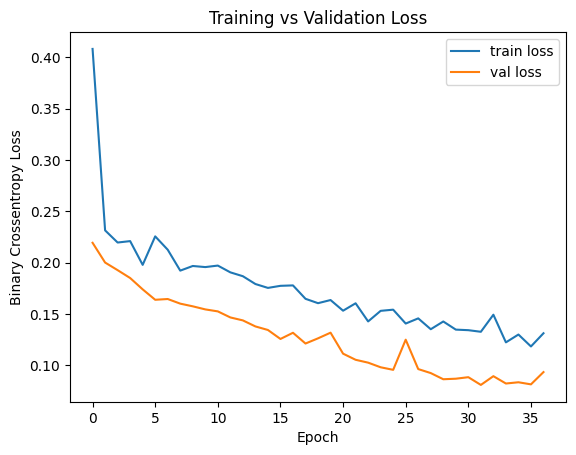

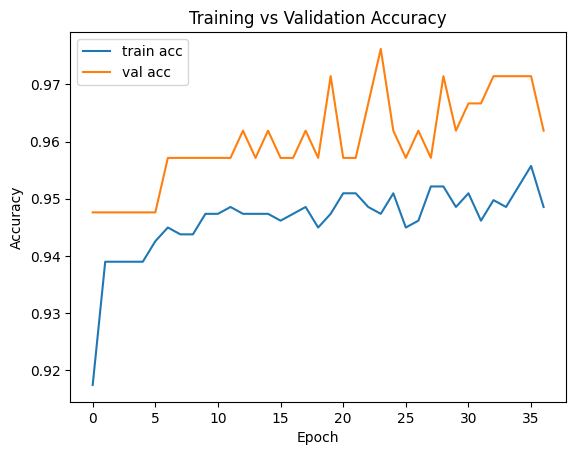

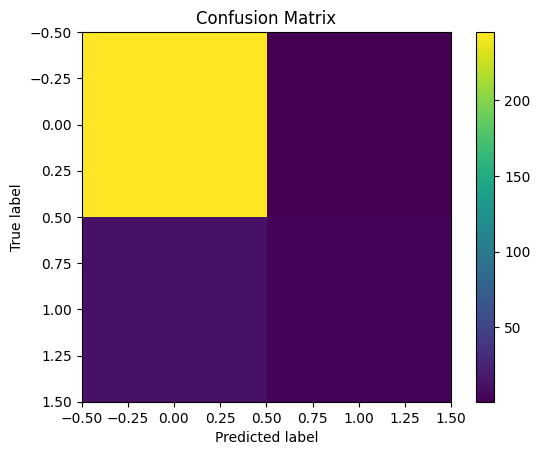

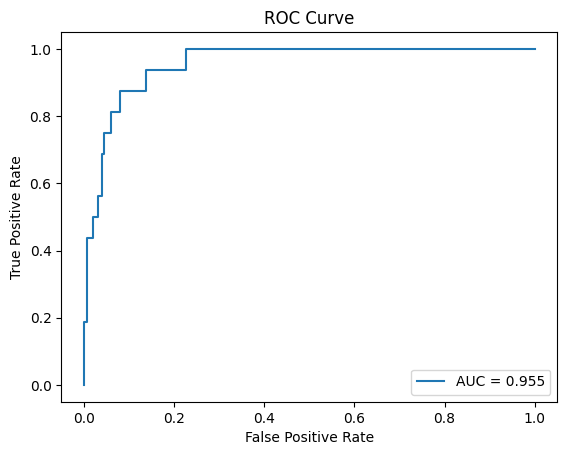

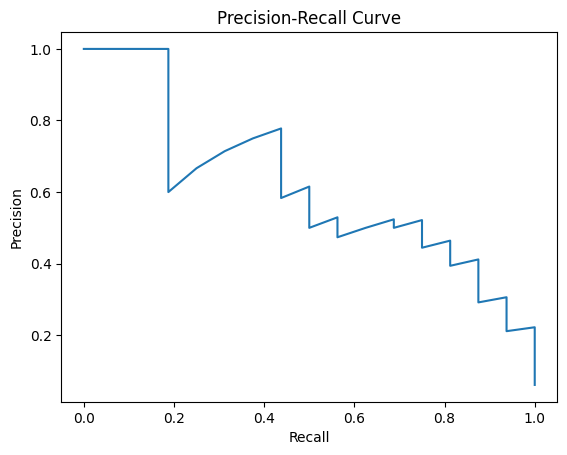

In [7]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    precision_recall_curve
)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_csv('/Users/owlxshri/Desktop/coral reef/mlpr-project/statisticalinf/g4m copy.csv')
df.dropna(inplace=True)

# 2. Features / target split
X = df.drop('Bleaching', axis=1).values
y = df['Bleaching'].astype(int).values

# 3. Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 4. Reshape for LSTM: (samples, timesteps, features)
X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_lstm, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Build the LSTM model
model = Sequential([
    LSTM(64, input_shape=(1, X_lstm.shape[2])),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

model.summary()

# 7. Train with early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# 8. Predictions
y_pred_proba = model.predict(X_test).ravel()
y_pred = (y_pred_proba > 0.5).astype(int)

# 9. Compute all metrics
acc   = accuracy_score(y_test, y_pred)
prec  = precision_score(y_test, y_pred)
rec   = recall_score(y_test, y_pred)
f1    = f1_score(y_test, y_pred)
auc   = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)
cm     = confusion_matrix(y_test, y_pred)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC AUC:   {auc:.4f}\n")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(cm)

# 10. Plotting

# — Loss curves
plt.figure()
plt.plot(history.history['loss'],      label='train loss')
plt.plot(history.history['val_loss'],  label='val loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.show()

# — Accuracy curves
plt.figure()
plt.plot(history.history['accuracy'],      label='train acc')
plt.plot(history.history['val_accuracy'],  label='val acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# — Confusion matrix heatmap
plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.colorbar()
plt.show()

# — ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# — Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
